In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
from ema_workbench import (Model, MultiprocessingEvaluator, 
                           Policy, Scenario, ema_logging,
                           save_results, load_results, 
                           SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

import time
from problem_formulation import get_model_for_problem_formulation

# sns pair_plots create a lot of warnings
import warnings
warnings.filterwarnings('ignore')


ema_logging.log_to_stderr(ema_logging.INFO)

# for Open exploration we choose problem formulation 6, 
#which is highly disaggregated
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), 
# lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [4]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [5]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x000002CA0E3EEAF0>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x000002CA0E3EEAF0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x000002CA0E3EEAF0>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x000002CA0E3EEAF0>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

In [6]:
# running the model through EMA workbench
try:
    results = load_results('results/open_exploration.tar.gz')
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=500, policies=100)
        save_results(results, 'results/open_exploration.tar.gz')
# observing the simulation runs
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\MBDM\final assignment\results\open_exploration.tar.gz


In [7]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,12.0,196.049289,10.0,0.928707,261.436603,10.0,0.556528,101.881912,1.5,0.219548,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,0,0,dikesnet
1,107.0,88.962604,1.5,0.873807,267.855008,1.5,0.911126,53.258601,1.0,0.009783,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,1,0,dikesnet
2,44.0,118.839013,1.5,0.200569,208.688641,10.0,0.222467,66.918365,1.0,0.209988,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,2,0,dikesnet
3,32.0,332.225929,10.0,0.369382,348.458264,1.0,0.487069,140.640012,1.5,0.072263,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,3,0,dikesnet
4,63.0,287.600177,1.5,0.728108,298.352511,1.5,0.254642,60.607872,10.0,0.543411,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,63.0,212.613048,1.5,0.448640,204.004672,1.5,0.174004,310.417081,1.5,0.700947,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,495,99,dikesnet
49996,68.0,319.486358,1.5,0.926600,53.324749,10.0,0.715006,94.511333,10.0,0.621755,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,496,99,dikesnet
49997,82.0,295.493397,1.0,0.942111,85.325680,1.0,0.420585,81.426887,1.5,0.426154,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,497,99,dikesnet
49998,18.0,114.435242,1.0,0.348111,83.316255,1.5,0.764033,248.393443,10.0,0.478631,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,498,99,dikesnet


In [8]:
outcomes

{'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Dike Investment Costs': array([2.62167392e+08, 2.62167392e+08, 2.62167392e+08, ...,
        2.81975148e+08, 2.81975148e+08, 2.81975148e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage': array([     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        , 990537.89984249]),
 'A.2_Dike Investment Costs': array([2.65985127e+08, 2.65985127e+08, 2.65985127e+08, ...,
        2.67968038e+08, 2.67968038e+08, 2.67968038e+08]),
 'A.2_Expected Number of Deaths': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0001754]),
 'A.3_Expected Annual Damage': array([       0.        , 32911824.61266958,        0.        , ...,
               0.        ,        0.        ,        0.        ]),
 'A.3_Dike Investment Costs': array([9.51027694e+07, 9.51027694e+07, 9.51027694e+07, ...,
        1.62311523e+08, 1.623

In [9]:
# create a dataframe from the outcomes with an extra column with policy names
policies = experiments['policy']
data = pd.DataFrame(outcomes)
data['policy'] = policies

In [10]:
# add columns to the dataframe in which total outcomes are defined for damage, investment costs and number of deaths
data['total expected Annual Damage'] = data['A.1_Expected Annual Damage'] + \
                                       data['A.2_Expected Annual Damage'] + \
                                       data['A.3_Expected Annual Damage'] + \
                                       data['A.4_Expected Annual Damage'] + \
                                       data['A.5_Expected Annual Damage']

data['total dike investment costs'] = data['A.1_Dike Investment Costs'] + \
                                      data['A.2_Dike Investment Costs'] + \
                                      data['A.3_Dike Investment Costs'] + \
                                      data['A.4_Dike Investment Costs'] + \
                                      data['A.5_Dike Investment Costs']

data['total Expected Number of Deaths'] = data['A.1_Expected Number of Deaths'] + \
                                          data['A.2_Expected Number of Deaths'] + \
                                          data['A.3_Expected Number of Deaths'] + \
                                          data['A.4_Expected Number of Deaths'] + \
                                          data['A.5_Expected Number of Deaths']


In [11]:
#create an outcomes dataframe with only the relevant outcomes for A3
A_1data = data[['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs',
                'A.1_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_2data = data[['A.2_Expected Annual Damage', 'A.2_Dike Investment Costs',
                'A.2_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs',
                'A.3_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_4data = data[['A.4_Expected Annual Damage', 'A.4_Dike Investment Costs',
                'A.4_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_5data = data[['A.5_Expected Annual Damage', 'A.5_Dike Investment Costs',
                'A.5_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_totaldata=data[['total expected Annual Damage', 'total dike investment costs',
                  'total Expected Number of Deaths', 'RfR Total Costs',
                  'Expected Evacuation Costs', "policy"]]


In [12]:
data.columns

Index(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs',
       'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths',
       'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs',
       'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage',
       'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths',
       'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs', 'policy', 'total expected Annual Damage',
       'total dike investment costs', 'total Expected Number of Deaths'],
      dtype='object')

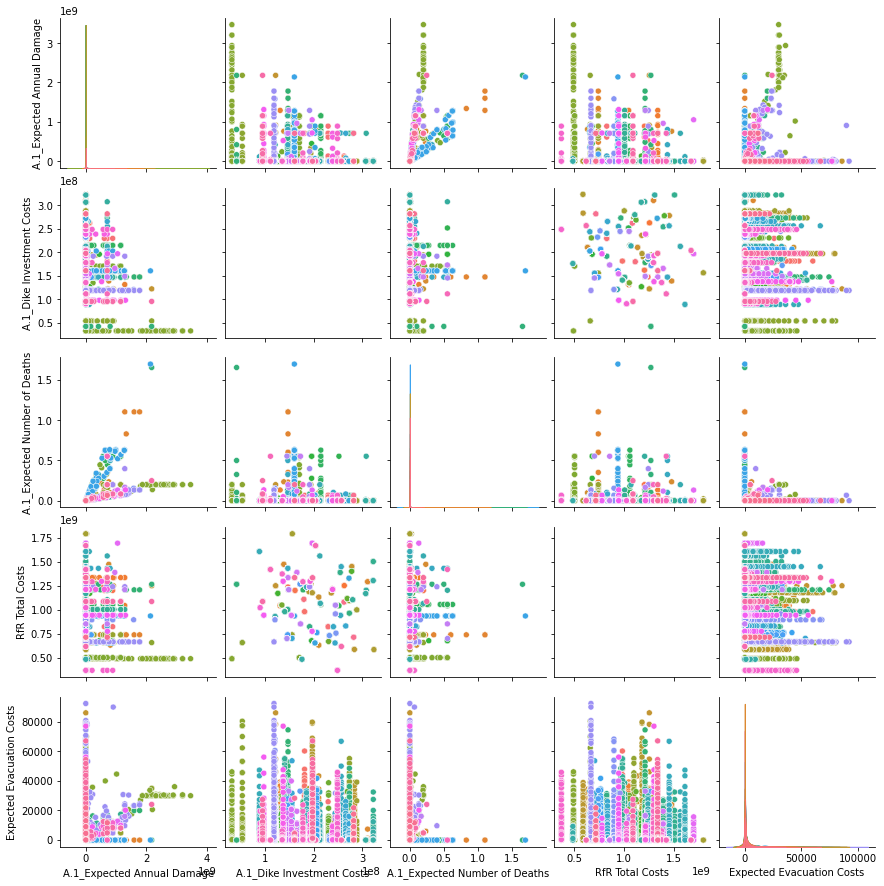

In [13]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A1pairplot=sns.pairplot(A_1data, 
                        hue='policy', 
                        vars=['A.1_Expected Annual Damage', 
                              'A.1_Dike Investment Costs', 
                              'A.1_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A1pairplot._legend.remove()
A1pairplot.savefig("Figures/A1pairplot.png")

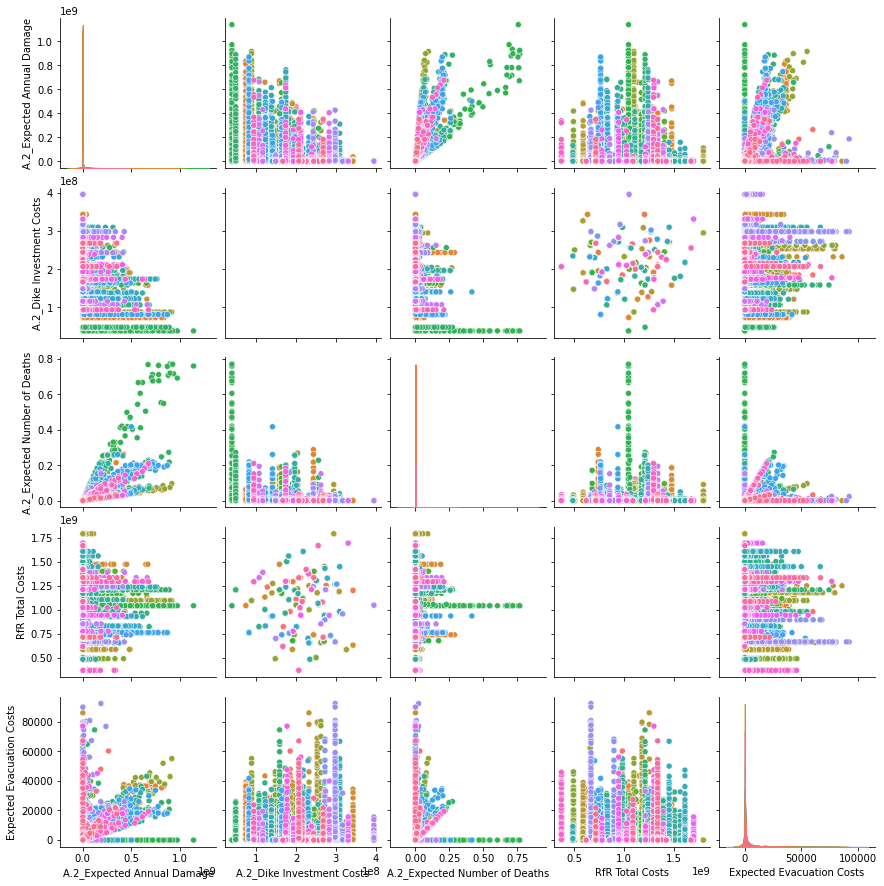

In [14]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A2pairplot=sns.pairplot(A_2data, 
                        hue='policy', 
                        vars=['A.2_Expected Annual Damage', 
                              'A.2_Dike Investment Costs', 
                              'A.2_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A2pairplot._legend.remove()
A2pairplot.savefig("Figures/A2pairplot.png")

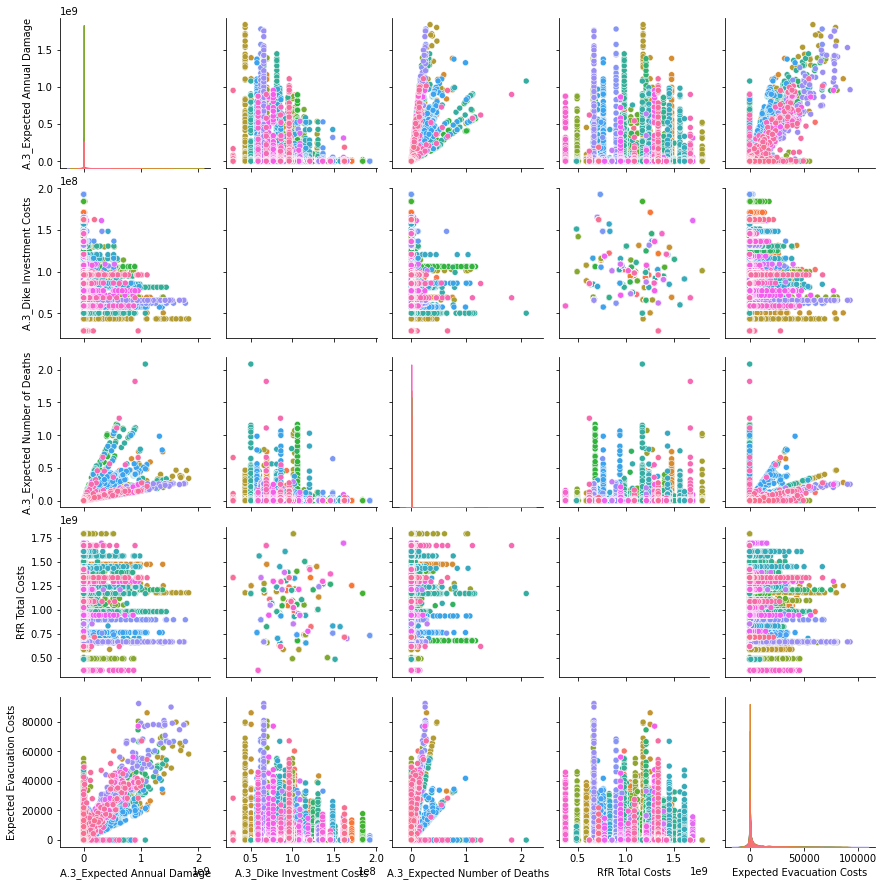

In [15]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A3pairplot=sns.pairplot(A_3data, 
                        hue='policy', 
                        vars=['A.3_Expected Annual Damage', 
                              'A.3_Dike Investment Costs', 
                              'A.3_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A3pairplot._legend.remove()
A3pairplot.savefig("Figures/A3pairplot.png")

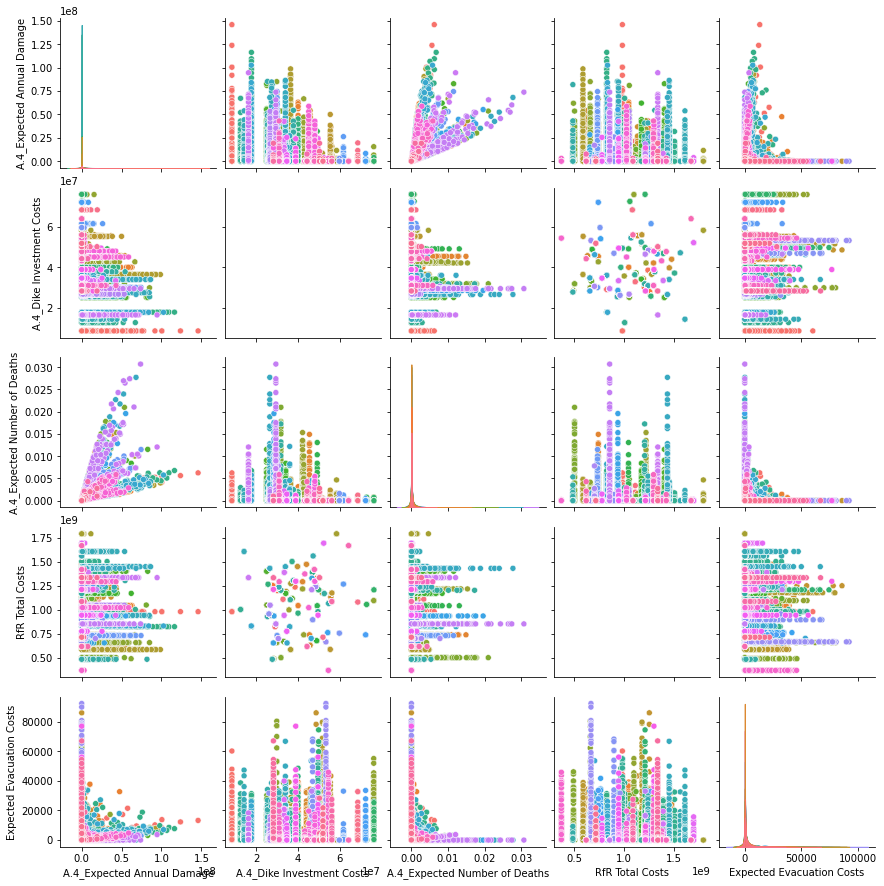

In [16]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A4pairplot=sns.pairplot(A_4data, 
                        hue='policy', 
                        vars=['A.4_Expected Annual Damage', 
                              'A.4_Dike Investment Costs', 
                              'A.4_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A4pairplot._legend.remove()
A4pairplot.savefig("Figures/A4pairplot.png")

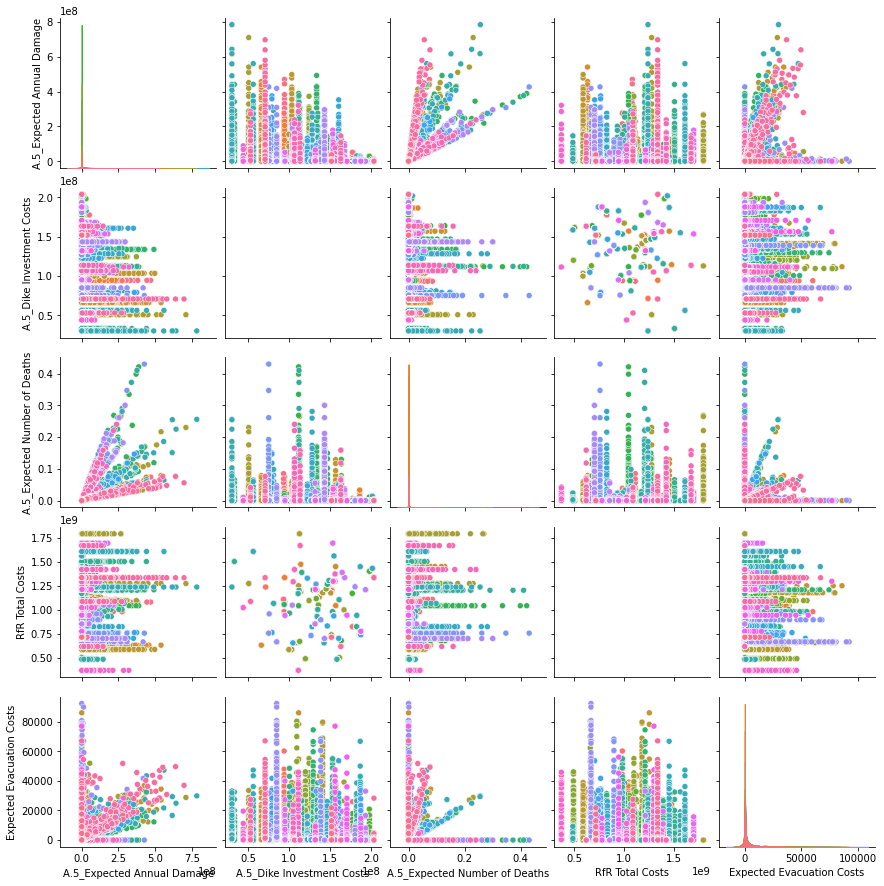

In [17]:
# a pairplot is created to be able to have a first glance at the objectives 
# and possible trade-offs
A5pairplot=sns.pairplot(A_5data, 
                        hue='policy', 
                        vars=['A.5_Expected Annual Damage', 
                              'A.5_Dike Investment Costs', 
                              'A.5_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A5pairplot._legend.remove()
A5pairplot.savefig("Figures/A5pairplot.png")

Various correlations between outcomes are present.

1. For all dike rings: the expected annual damage and the expected number of deaths at a specific dike ring are positively correlated. The correlation coefficient that governs the mathematical connection seems again to be correlated with the specific policy that is in place. 
2. For all dike rings: the expected annual damage at a specific dike ring and the total expected evacuation costs are positively correlated in a relatively large fraction of the cases. They are also never negatively correlated.
3. For all dike rings: the expected number of deaths at a specific dike ring and the total expected evacuation costs are positively correlated in a relatively large fraction of the cases. They are also never negatively correlated.

The ranges of dike ring specific levers and outcomes differ significantly.
1. The highest expected annual damage per dike ring can be ordered as follows: [A1,A3,A2,A5,A4], from highest to lowest.
2. The most expected number of deaths per dike ring can be ordered as follows: [A3,A1,A2,A5,A4], from highest to lowest.
3. The highest dike investment costs per dike ring can be ordered as follows: [A2,A1,A3,A5,A4], from highest to lowest.

The policy options differ significantly in their effectiveness. 
1. For all dike rings: the more is invested in dikes at a specific dike ring, the less  number of deaths are expected at that specific dike ring and the less annual damage can be expected at that same dike ring.
2. Only for dike ring A3: the more is invested in dikes, the less total evacuation cost is expected.
3. For all dike rings: spending more on RFR measures does not unambiguously lead to less expected number of deaths, less expected annual damage or less expected evacuation costs.

## PRIM Scenario Discovery

For the prim analyses boundaries have to be set on the outcomes of interest. To determine which boundary to pick, kde plots are made.

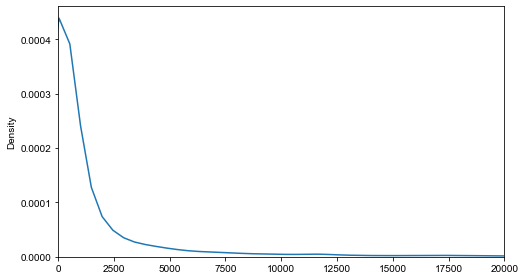

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.show()

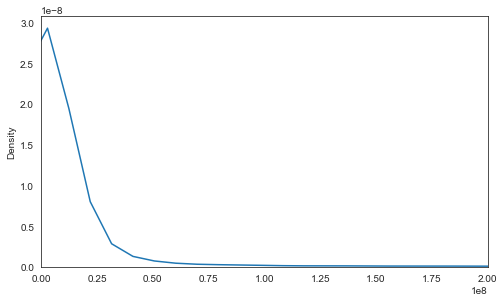

In [19]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Annual Damage'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2E08])
fig.subplots_adjust(bottom=0.3)
plt.show()

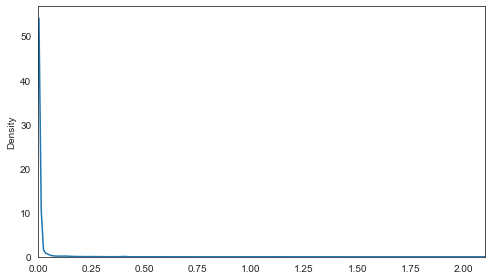

In [20]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Number of Deaths'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2.1])
fig.subplots_adjust(bottom=0.3)
plt.show()

boundaries are set on the variables and the fraction of cases which are subsequently evaluated, are determined. All three boundaries contain approximately 75% of the cases.

In [21]:
ydeaths = outcomes['A.3_Expected Number of Deaths'] < 1e-5
np.sum(ydeaths)/len(outcomes['A.3_Expected Number of Deaths'])

0.76362

In [22]:
ydamage=outcomes['A.3_Expected Annual Damage'] < 1e6
np.sum(ydamage)/len(outcomes['A.3_Expected Annual Damage'])

0.76372

In [23]:
yevac=outcomes['Expected Evacuation Costs'] < 1e3
np.sum(yevac)/len(outcomes['Expected Evacuation Costs'])

0.7365

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 38181 cases of interest
[MainProcess/INFO] mean: 0.9864, mass: 0.05, coverage: 0.06458709829496347, density: 0.9864 restricted_dimensions: 14


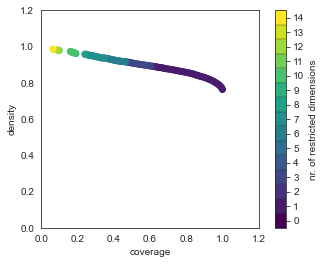

In [24]:
from ema_workbench.analysis import prim
x1 = experiments.drop([o.name for o in dike_model.levers] + ["policy"], axis=1)

prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.show()

In [25]:
boxbestdeaths.peeling_trajectory[35:60]

,coverage,density,id,mass,mean,res_dim
35,0.768995,0.863559,35,0.680,0.863559,1
36,0.761426,0.865238,36,0.672,0.865238,1
37,0.753909,0.867018,37,0.664,0.867018,1
38,0.746026,0.868415,38,0.656,0.868415,1
39,0.738168,0.869877,39,0.648,0.869877,1
40,0.730311,0.871375,40,0.640,0.871375,1
41,0.722270,0.872690,41,0.632,0.872690,1
42,0.714230,0.874038,42,0.624,0.874038,1
43,0.706294,0.875552,43,0.616,0.875552,1
44,0.697991,0.876645,44,0.608,0.876645,1


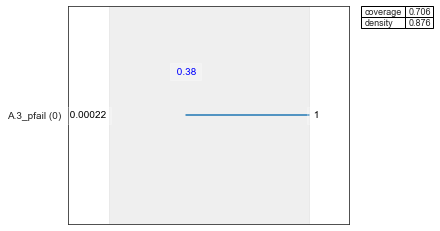

In [33]:
bestdeaths=boxbestdeaths.inspect(43,style='graph')
bestdeaths.savefig("Figures/PRIM_deaths.png")

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 38186 cases of interest
[MainProcess/INFO] mean: 0.9864, mass: 0.05, coverage: 0.06457864138689572, density: 0.9864 restricted_dimensions: 14


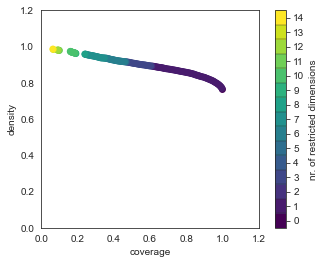

In [34]:
prim_alg = prim.Prim(x1, ydamage, threshold=0.5, peel_alpha=0.01)
boxbestdamage = prim_alg.find_box()

boxbestdamage.show_tradeoff()
plt.show()

In [35]:
boxbestdamage.peeling_trajectory[0:60]

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.763720,0,1.000,0.763720,0
1,0.997748,0.769697,1,0.990,0.769697,1
2,0.994396,0.774939,2,0.980,0.774939,1
3,0.990311,0.779711,3,0.970,0.779711,1
4,0.985937,0.784354,4,0.960,0.784354,1
5,0.981040,0.788674,5,0.950,0.788674,1
6,0.975776,0.792787,6,0.940,0.792787,1
7,0.970225,0.796753,7,0.930,0.796753,1
8,0.964149,0.800370,8,0.920,0.800370,1
9,0.958021,0.804022,9,0.910,0.804022,1


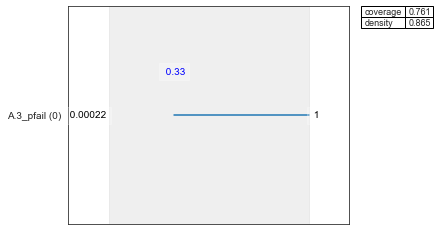

In [36]:
bestdamage=boxbestdamage.inspect(36,style='graph')
bestdamage.savefig("Figures/PRIM_damage.png")

Conclusions:
1. Little amount of damage at dike ring A3 is correlated with a high A.3_pfail value.
2. The similar dependence of A.3_Expected Number of Deaths and A.3_Expected Annual Damage
on A.3_pfail, seems to indicate, similar to the Open Exploration, that A.3_Expected Number of
Deaths and A.3_Expected Annual Damage are highly correlated.


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 36825 cases of interest
[MainProcess/INFO] mean: 0.9507142857142857, mass: 0.056, coverage: 0.07228784792939578, density: 0.9507142857142857 restricted_dimensions: 14


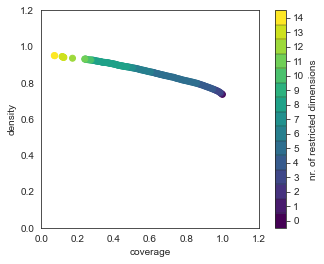

In [37]:
prim_alg = prim.Prim(x1, yevac, threshold=0.5, peel_alpha=0.01)
boxbestevac= prim_alg.find_box()

boxbestevac.show_tradeoff()
plt.show()

In [38]:
boxbestevac.peeling_trajectory[60:80]

,coverage,density,id,mass,mean,res_dim
60,0.596578,0.861529,60,0.510,0.861529,6
61,0.590604,0.863056,61,0.504,0.863056,6
62,0.584467,0.864378,62,0.498,0.864378,6
63,0.578601,0.866138,63,0.492,0.866138,6
64,0.572383,0.867407,64,0.486,0.867407,6
65,0.566327,0.868958,65,0.480,0.868958,6
66,0.560081,0.870253,66,0.474,0.870253,6
67,0.553836,0.871581,67,0.468,0.871581,6
68,0.547590,0.872944,68,0.462,0.872944,6
69,0.541507,0.874605,69,0.456,0.874605,6


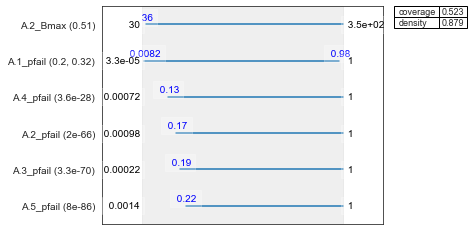

In [39]:
bestevac=boxbestevac.inspect(72,style='graph')
bestevac.savefig("Figures/PRIM_evac.png")

Conclusion:
Little total evacuation costs is correlated with higher 2 pfail values, in the order (A.5_pfail, A.3_pfail,
A.2_pfail, A.4_pfail, A.1_pfail), ordered by influence.